<a href="https://colab.research.google.com/github/paki66/Linear-regression/blob/main/probaAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
"""
from google.colab import files
uploaded = files.upload()
"""

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [134]:
"""
import io
df2 = pd.read_csv(io.BytesIO(uploaded['spam.csv']))
"""

"\nimport io\ndf2 = pd.read_csv(io.BytesIO(uploaded['spam.csv']))\n"

In [135]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/paki66/artificialintelligence/main/spam.csv"
s=requests.get(url).text

df = pd.read_csv(StringIO(s))
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [136]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [137]:
numOfSpam = 0
numOfHam = 0

for i in range(len(df.index)):
  if df.at[i, "v1"] == "ham":
    numOfHam += 1
  else:
    numOfSpam += 1
numOfHam

4825

([<matplotlib.patches.Wedge at 0x7f5a937f6ad0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

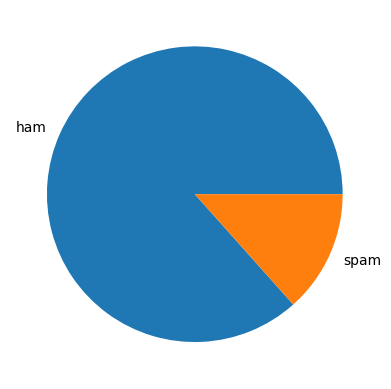

In [138]:
import matplotlib.pyplot as plt
labels = "ham", "spam"
sizes = [numOfHam, numOfSpam]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

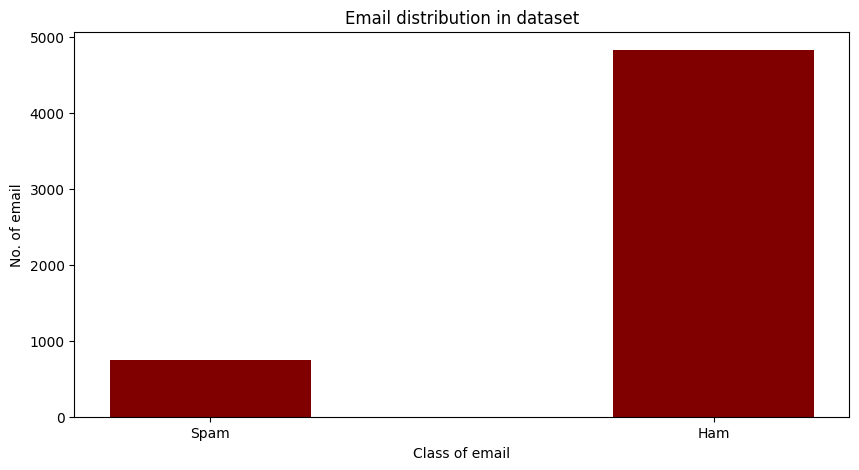

In [139]:
import numpy as np

values = [numOfSpam, numOfHam]
classes = ["Spam", "Ham"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='maroon',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in dataset")
plt.show()

In [175]:
from sklearn.model_selection import train_test_split

y=df['v1']
X=df["v2"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y)


In [177]:
type(X_train)

pandas.core.series.Series

In [178]:
"""
numOfSpamTrain = 0
numOfHamTrain = 0

for i in range(len(X_train.index)):
  if X_train.at[i, "v1"] == "ham":
    numOfHamTrain += 1
  else:
    numOfSpamTrain += 1
numOfHamTrain
"""

'\nnumOfSpamTrain = 0\nnumOfHamTrain = 0\n\nfor i in range(len(X_train.index)):\n  if X_train.at[i, "v1"] == "ham":\n    numOfHamTrain += 1\n  else:\n    numOfSpamTrain += 1\nnumOfHamTrain\n'

In [179]:
"""
y_val = y_val.reset_index(drop = True)
y_train = y_train.reset_index(drop=True)
y_val
"""

'\ny_val = y_val.reset_index(drop = True)\ny_train = y_train.reset_index(drop=True)\ny_val\n'

In [180]:
y_val = y_val.reset_index(drop = True)
y_val

0       ham
1       ham
2       ham
3       ham
4      spam
       ... 
553     ham
554     ham
555     ham
556     ham
557    spam
Name: v1, Length: 558, dtype: object

In [181]:
X_val = X_val.reset_index(drop = True)
X_val

0      Sad story of a Man - Last week was my b'day. M...
1      So there's a ring that comes with the guys cos...
2                       Did you try making another butt.
3      Hello. Sort of out in town already. That . So ...
4      January Male Sale! Hot Gay chat now cheaper, c...
                             ...                        
553                      Also maaaan are you missing out
554    And is there a way you can send shade's stuff ...
555    Babe? You said 2 hours and it's been almost 4 ...
556    Forgot it takes me 3 years to shower, sorry. W...
557    Will u meet ur dream partner soon? Is ur caree...
Name: v2, Length: 558, dtype: object

In [182]:
X_train = X_train.reset_index(drop = True)
X_train

0       Check mail.i have mailed varma and kept copy t...
1       Haha... Really oh no... How? Then will they de...
2       I wanted to wish you a Happy New Year and I wa...
3       Where wuld I be without my baby? The thought a...
4                         Y �_ wan to go there? C doctor?
                              ...                        
5009    Hi 07734396839 IBH Customer Loyalty Offer: The...
5010    How have your little darlings been so far this...
5011    Congratulations U can claim 2 VIP row A Ticket...
5012    In case you wake up wondering where I am, I fo...
5013                             K..k.:)congratulation ..
Name: v2, Length: 5014, dtype: object

In [183]:
y_train = y_train.reset_index(drop = True)
y_train

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
5009    spam
5010     ham
5011    spam
5012     ham
5013     ham
Name: v1, Length: 5014, dtype: object

In [184]:
numOfSpamTrain = 0
numOfHamTrain = 0
numOfSpamTest = 0
numOfHamTest = 0

for i in range(1,len(y_train)):
  if y_train[i]=="ham":
    numOfHamTrain+=1
  else:
    numOfSpamTrain+=1

for i in range(1,len(y_val)):
  if y_val[i]=="ham":
    numOfHamTest+=1
  else:
    numOfSpamTest+=1

([<matplotlib.patches.Wedge at 0x7f5a938f2110>,
 [Text(-1.0038880869579652, 0.44967622670525637, 'ham train'),
  Text(1.0038881290596877, -0.4496761327144681, 'spam train')])

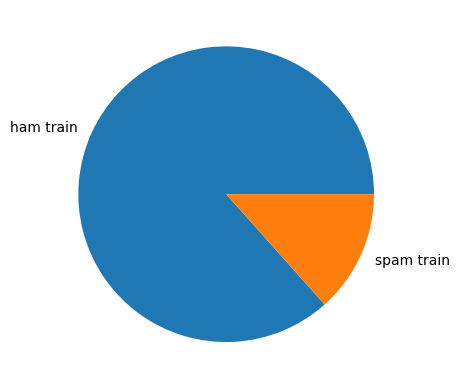

In [185]:
labels = "ham train", "spam train"
sizes = [numOfHamTrain, numOfSpamTrain]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

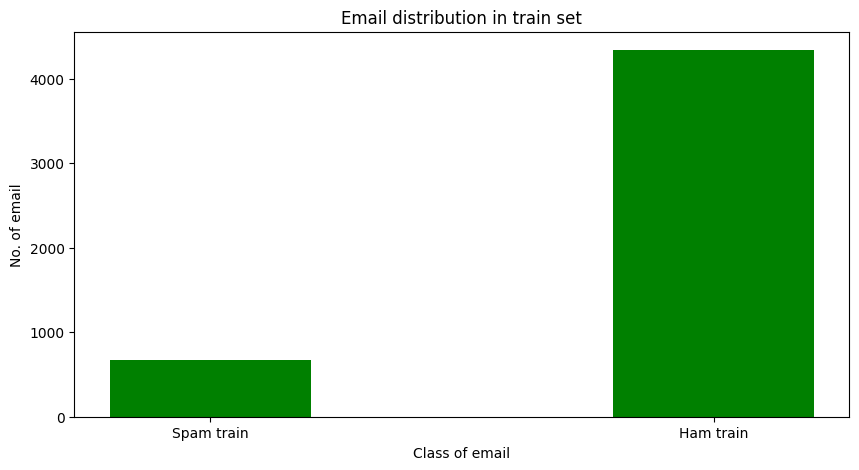

In [186]:
values = [numOfSpamTrain, numOfHamTrain]
classes = ["Spam train", "Ham train"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='green',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in train set")
plt.show()

([<matplotlib.patches.Wedge at 0x7f5a93411420>,
 [Text(-1.003040826106092, 0.45156295371122834, 'ham test'),
  Text(1.0030408049669033, -0.45156300066695787, 'spam test')])

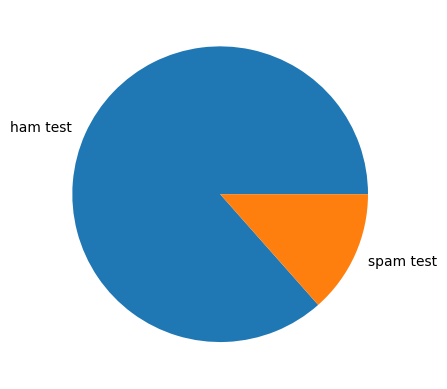

In [187]:
labels = "ham test", "spam test"
sizes = [numOfHamTest, numOfSpamTest]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

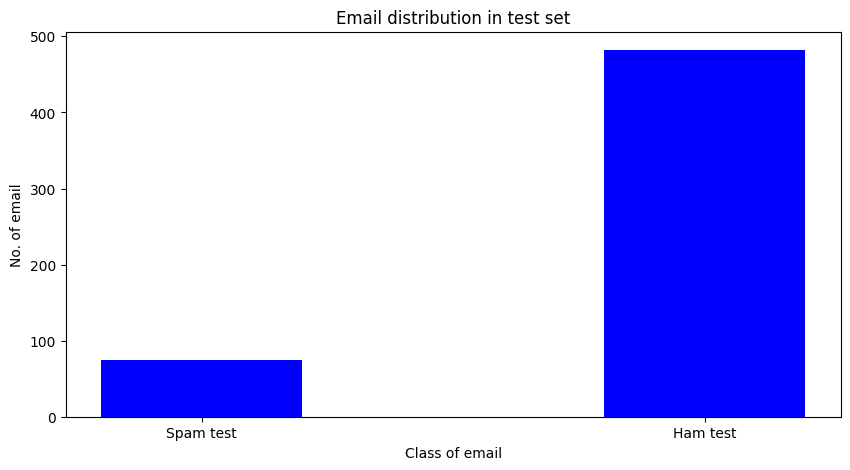

In [188]:
values = [numOfSpamTest, numOfHamTest]
classes = ["Spam test", "Ham test"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='blue',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in test set")
plt.show()

In [189]:
import string


for i in range(len(X_train)):
  X_train[i] = X_train[i].lower()
  X_train[i] = X_train[i].translate(str.maketrans('', '', string.punctuation))
  X_train[i] = X_train[i].translate(str.maketrans('', '', string.digits))

X_train[1]

'haha really oh no how then will they deduct your lesson tmr'

In [190]:
for i in range(len(X_val)):
  X_val[i] = X_val[i].lower()
  X_val[i] = X_val[i].translate(str.maketrans('', '', string.punctuation))
  X_val[i] = X_val[i].translate(str.maketrans('', '', string.digits))

X_val[0]

'sad story of a man  last week was my bday my wife didnt wish me my parents forgot n so did my kids  i went to work even my colleagues did not wish as i entered my cabin my pa said  happy bday boss  i felt special she askd me  lunch after lunch she invited me to her apartment we went there she said do u mind if i go into the bedroom for a minute   ok i sed in a sexy mood she came out  minuts latr wid a caken my wife my parents my kidz my friends n my colleagues all screaming surprise  and i was waiting on the sofa    naked'

In [191]:
#!pip install nltk

In [192]:
type(X_train[0])

str

In [193]:
"""
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
"""

"\nimport nltk\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import word_tokenize\nnltk.download('punkt')\nnltk.download('wordnet')\n"

In [194]:
"""
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))
"""

'\n# import these modules\nfrom nltk.stem import WordNetLemmatizer\n\nlemmatizer = WordNetLemmatizer()\n\nprint("rocks :", lemmatizer.lemmatize("rocks"))\nprint("corpora :", lemmatizer.lemmatize("corpora"))\n\n# a denotes adjective in "pos"\nprint("better :", lemmatizer.lemmatize("better", pos ="a"))\n'

In [195]:
"""
#word stemming
ps = PorterStemmer()

for i in range(len(X_train)):
  words = word_tokenize(X_train[i])
  
  for j in range(len(words)):
    words[j] = ps.stem(words[j])
    words[j] = lemmatizer.lemmatize(words[j])
  words = " ".join(words)
  X_train[i] = words


for i in range(len(X_val)):
  words = word_tokenize(X_val[i])
  for j in range(len(words)):
    words[j] = ps.stem(words[j])
    words[j] = lemmatizer.lemmatize(words[j])
  words = " ".join(words)
  X_train[i] = words

"""

'\n#word stemming\nps = PorterStemmer()\n\nfor i in range(len(X_train)):\n  words = word_tokenize(X_train[i])\n  \n  for j in range(len(words)):\n    words[j] = ps.stem(words[j])\n    words[j] = lemmatizer.lemmatize(words[j])\n  words = " ".join(words)\n  X_train[i] = words\n\n\nfor i in range(len(X_val)):\n  words = word_tokenize(X_val[i])\n  for j in range(len(words)):\n    words[j] = ps.stem(words[j])\n    words[j] = lemmatizer.lemmatize(words[j])\n  words = " ".join(words)\n  X_train[i] = words\n\n'

In [196]:

X_train[0]

'check maili have mailed varma and kept copy to you regarding membershiptake careinsha allah'

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)

In [202]:

vectorizer.fit(X_train)
vectorizer.vocabulary_


{'check': 1117,
 'maili': 4017,
 'have': 2898,
 'mailed': 4016,
 'varma': 7363,
 'and': 249,
 'kept': 3549,
 'copy': 1402,
 'to': 7000,
 'you': 7938,
 'regarding': 5574,
 'membershiptake': 4150,
 'careinsha': 1011,
 'allah': 197,
 'haha': 2833,
 'really': 5517,
 'oh': 4710,
 'no': 4558,
 'how': 3093,
 'then': 6874,
 'will': 7658,
 'they': 6890,
 'deduct': 1642,
 'your': 7954,
 'lesson': 3756,
 'tmr': 6996,
 'wanted': 7494,
 'wish': 7684,
 'happy': 2876,
 'new': 4512,
 'year': 7904,
 'talk': 6720,
 'about': 17,
 'some': 6267,
 'legal': 3737,
 'advice': 103,
 'do': 1814,
 'with': 7692,
 'when': 7612,
 'gary': 2577,
 'split': 6374,
 'but': 913,
 'in': 3233,
 'person': 5010,
 'ill': 3203,
 'make': 4023,
 'trip': 7126,
 'ptbo': 5376,
 'for': 2419,
 'that': 6851,
 'hope': 3060,
 'everything': 2138,
 'is': 3350,
 'good': 2697,
 'babe': 487,
 'love': 3920,
 'ya': 7887,
 'where': 7617,
 'wuld': 7809,
 'be': 584,
 'without': 7696,
 'my': 4422,
 'baby': 491,
 'the': 6860,
 'thought': 6922,
 'alon

In [199]:
#vectorizer.idf_

array([8.82704152, 8.42157641, 8.82704152, ..., 8.82704152, 8.82704152,
       8.82704152])

In [ ]:
"""
vector = vectorizer.transform(X_train)
vector.toarray()
"""

In [201]:
vector = vectorizer.fit_transform(X_train)
vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
"""
X_train = list(X_train)
type(X_train[0])
"""

str

In [166]:
"""
vector = vectorizer.transform(X_train)
vector.toarray()
"""

fitted_vectorizer = vectorizer.fit(X_train)
vector = fitted_vectorizer.transform(X_train)


In [167]:
"""
import scipy
vector = []
for i in range(len(X_train)):
  vector.append(vectorizer.transform([X_train[i]]))
vector = scipy.sparse.csr_matrix(vector)
vector.toarray()
"""

'\nimport scipy\nvector = []\nfor i in range(len(X_train)):\n  vector.append(vectorizer.transform([X_train[i]]))\nvector = scipy.sparse.csr_matrix(vector)\nvector.toarray()\n'

In [168]:
"""
vector = []
for i in range(len(X_train)):
  vector.append(vectorizer.transform([X_train[i]]))
vector = np.array(vector)

for i in range(len(vector.toarray())):
  if vector.toarray()[0][i] != 0:
    print(vector.toarray()[0][i])

vector.toarray()
"""

'\nvector = []\nfor i in range(len(X_train)):\n  vector.append(vectorizer.transform([X_train[i]]))\nvector = np.array(vector)\n\nfor i in range(len(vector.toarray())):\n  if vector.toarray()[0][i] != 0:\n    print(vector.toarray()[0][i])\n\nvector.toarray()\n'

In [169]:
vectorizer.get_feature_names_out().shape

(8051,)

In [170]:
vector.toarray()[0][1]

0.0

In [171]:
vector.toarray().shape

(5014, 8051)

In [172]:
y_train.shape

(5014,)

In [173]:
X_train.shape

AttributeError: ignored

In [70]:
vector_val = vectorizer.transform(X_val)

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(vector.toarray(),y_train)
gnb.score(vector.toarray(),y_train)

0.8522138013562026

In [73]:
gnb.score(vector_val.toarray(),y_val)

0.6075268817204301

In [ ]:
y_pred = gnb.predict(vector_val.toarray())

y_pred